<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/2-5-multimodal_q_and_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visual Question & Answering

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
```

- Here is some code that suppresses warning messages.

In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

* Load the Model and the Processor.

In [2]:
from transformers import BlipForQuestionAnswering

In [3]:
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Info about [Salesforce/blip-vqa-base](https://huggingface.co/Salesforce/blip-vqa-base)

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


- Load the image.

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iwkBY_B_3tBYhVanLE04qBiYzVPqLgWs' -O elephant2.png

--2024-09-06 00:50:31--  https://docs.google.com/uc?export=download&id=1iwkBY_B_3tBYhVanLE04qBiYzVPqLgWs
Resolving docs.google.com (docs.google.com)... 108.177.11.113, 108.177.11.101, 108.177.11.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1iwkBY_B_3tBYhVanLE04qBiYzVPqLgWs&export=download [following]
--2024-09-06 00:50:31--  https://drive.usercontent.google.com/download?id=1iwkBY_B_3tBYhVanLE04qBiYzVPqLgWs&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 843231 (823K) [image/png]
Saving to: ‘elephant2.png’

elephant2.png       100%[===================>] 823.47K  --.-KB/s    in 0.008s  

202

In [7]:
from PIL import Image

In [8]:
image = Image.open("./elephant2.png")

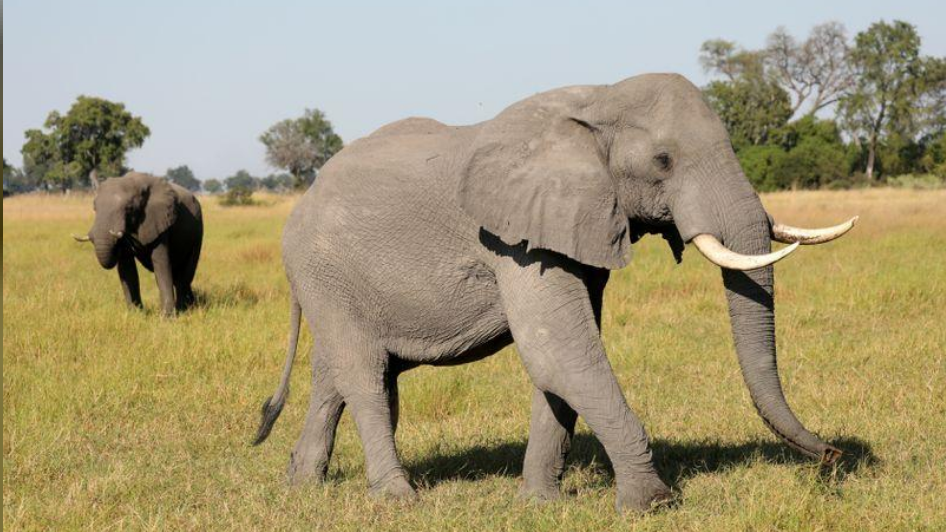

In [9]:
image

- Write the `question` you want to ask to the model about the image.

In [10]:
question = "how many elephants are in the picture?"

In [11]:
inputs = processor(image, question, return_tensors="pt")

In [12]:
out = model.generate(**inputs)

In [13]:
print(processor.decode(out[0], skip_special_tokens=True))

2
